# Experimentation Only

In [1]:
import sys
!{sys.executable} -m pip install tqdm

You are using pip version 9.0.3, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
import math
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
from datetime import datetime
import datetime as dt
from mpl_toolkits.mplot3d import Axes3D
from tqdm import tqdm, tqdm_notebook
import json
import requests
%matplotlib inline

#For Prediction
from sklearn import metrics
from sklearn import preprocessing, cross_validation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import keras
from keras.layers import Dense, Dropout, Input, LSTM, Reshape, Flatten, Activation
from keras.models import Model,Sequential
from keras.datasets import mnist
from tqdm import tqdm
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import Adam, RMSprop

/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [7]:
# endpoint = 'https://min-api.cryptocompare.com/data/histoday'
# res = requests.get(endpoint + '?fsym=BTC&tsym=USD&limit=2000')
# hist = pd.DataFrame(json.loads(res.content.decode('utf-8'))['Data'])
# hist = hist.set_index('time')
# hist.index = pd.to_datetime(hist.index, unit='s')
# hist.head()

hist = pd.read_csv('Datasets/BlockChain_Train_csv.csv')
hist.head()

,Date,Close,USD_Exchange_Trade_Volume,Bitcoins_in_circulation,MarketCap,BlockSize,AvgBlockSize,Orphaned_Block,TransactionsPerBlock,MedianTransactCnfmTime,...,USD/JPY,USD/CHF,USD/KRW,USD/GBP,EUR/KRW,USD/CNY,Google Trends Interest,GTrends Normalized,US Federal funds rate,Breakeven Inflation Rate
0,3-Jan-09,0.0,0.0,50.0,0.0,0.0,0.0,0,1.0,0.0,...,90.73,1.06,1269.75,0.69,1774.86,6.83,0,0.0,0.08,0.15
1,5-Jan-09,0.0,0.0,50.0,0.0,0.0,0.0,0,1.0,0.0,...,92.08,1.08,1326.15,0.69,1843.95,6.82,0,0.0,0.11,0.15
2,7-Jan-09,0.0,0.0,50.0,0.0,0.0,0.0,0,1.0,0.0,...,93.79,1.12,1305.55,0.67,1763.60,6.84,0,0.0,0.11,0.47
3,9-Jan-09,0.0,0.0,750.0,0.0,0.0,0.0,0,1.0,0.0,...,91.24,1.10,1324.45,0.66,1808.74,6.83,0,0.0,0.09,0.56
4,11-Jan-09,0.0,0.0,7600.0,0.0,0.0,0.0,0,1.0,0.0,...,91.24,1.10,1324.45,0.66,1808.74,6.83,0,0.0,0.09,0.56


In [9]:
#hist = hist.drop(['high','low','open','volumefrom','volumeto'], axis=1)
#hist = hist.drop(['Unix Timestamp','Date','Symbol','Open','High','Low','Volume'], axis=1)
#hist = hist.drop(['Date','Symbol','Unix Timestamp','Low','High'], axis=1)
hist = hist.drop(['Date','USD/AUD','USD/EUR','USD/JPY','USD/CHF','USD/KRW','USD/GBP','EUR/KRW','USD/CNY'], axis=1)
hist.tail()

,Close,USD_Exchange_Trade_Volume,Bitcoins_in_circulation,MarketCap,BlockSize,AvgBlockSize,Orphaned_Block,TransactionsPerBlock,MedianTransactCnfmTime,Hash_Rate,...,Estimated _Transaction_Value_USD_d,NASDAQ Composite,Dow Jones Industrial Avg,S&P 500,Gold Price Index,Crude Oil WTI,Google Trends Interest,GTrends Normalized,US Federal funds rate,Breakeven Inflation Rate
1768,6286.43,291261346.9,17259100.0,1.080000e+11,181951.87,0.62,0,1158.97,7.03,56874984.68,...,2.769264e+08,7902.54,25916.54,2871.68,1201.3,67.75,54,0.54,1.92,2.10
1769,6296.32,290980772.8,17262550.0,1.090000e+11,182206.04,0.94,0,1684.90,10.53,49198606.38,...,5.080071e+08,7972.47,25971.06,2887.89,1195.4,69.25,65,0.65,1.92,2.12
1770,6450.18,321882304.6,17266500.0,1.110000e+11,182446.38,0.82,0,1582.49,8.08,51641090.38,...,-8.745742e+08,8013.71,26145.99,2904.18,1202.0,68.59,65,0.65,1.92,2.10
1771,6518.66,360631436.3,17269900.0,1.130000e+11,182696.55,0.79,0,1507.65,9.03,48849680.09,...,1.992741e+08,8013.71,26154.67,2904.98,1198.3,68.99,50,0.50,1.92,2.10
1772,6400.60,181083665.0,17273325.0,1.110000e+11,182906.28,0.91,0,1778.90,9.37,47105048.66,...,9.871674e+07,7895.79,26062.12,2888.80,1203.1,68.91,58,0.58,1.92,2.10


In [10]:
print(len(hist))

1773


In [11]:
print("checking if any null values are present\n", hist.isna().sum())

checking if any null values are present
 Close                                               0
USD_Exchange_Trade_Volume                           0
Bitcoins_in_circulation                             0
MarketCap                                           0
BlockSize                                           0
AvgBlockSize                                        0
Orphaned_Block                                      0
TransactionsPerBlock                                0
MedianTransactCnfmTime                              0
Hash_Rate                                           0
Difficulty                                          0
MinersRevenue                                       0
TransactionFees_BTC                                 0
TransactionFees_USD                                 0
Cost%ofTransactionVolume                            0
CostPerTransaction                                  0
Unique_Addresses                                    0
Total_Transactions_Per_Day               

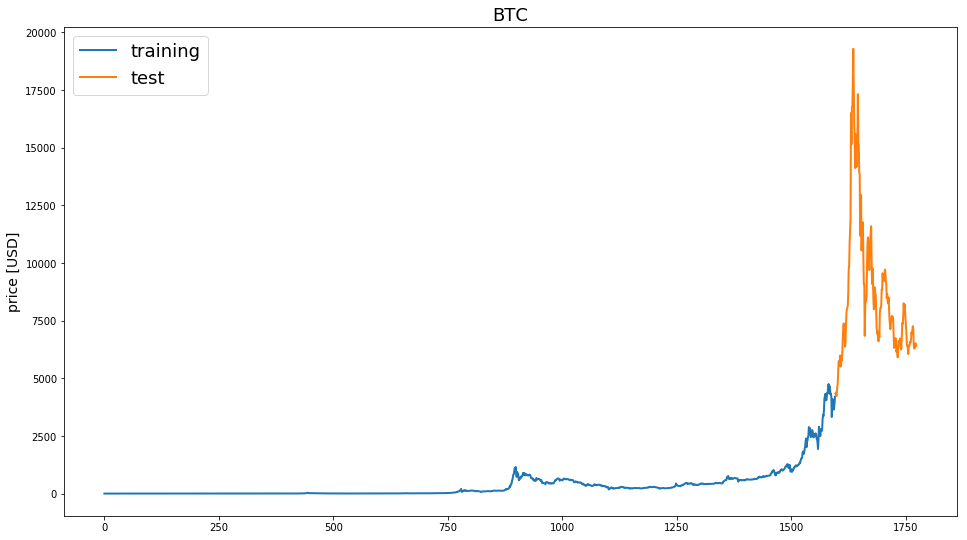

In [12]:
def train_test_split(df, test_size=0.1):
    split_row = len(df) - int(test_size * len(df))
    train_data = df.iloc[:split_row]
    test_data = df.iloc[split_row:]
    return train_data, test_data

def line_plot(line1, line2, label1=None, label2=None, title=''):
    fig, ax = plt.subplots(1, figsize=(16, 9))
    ax.plot(line1, label=label1, linewidth=2)
    ax.plot(line2, label=label2, linewidth=2)
    ax.set_ylabel('price [USD]', fontsize=14)
    ax.set_title(title, fontsize=18)
    ax.legend(loc='best', fontsize=18)
    
train, test = train_test_split(hist, test_size=0.1)
line_plot(train.Close, test.Close, 'training', 'test', 'BTC')

In [13]:
def normalise_zero_base(df):
    """ Normalise dataframe column-wise to reflect changes with
        respect to first entry.
    """
    return df / df.iloc[0] - 1

def extract_window_data(df, window=7, zero_base=True):
    """ Convert dataframe to overlapping sequences/windows of
        length `window`.
    """
    window_data = []
    for idx in range(len(df) - window):
        tmp = df[idx: (idx + window)].copy()
        if zero_base:
            tmp = normalise_zero_base(tmp)
        window_data.append(tmp.values)
    return np.array(window_data)

def prepare_data(df, window=7, zero_base=True, test_size=0.1):
    """ Prepare data for LSTM. """
    # train test split
    train_data, test_data = train_test_split(df, test_size)
    
    # extract window data
    X_train = extract_window_data(train_data, window, zero_base)
    X_test = extract_window_data(test_data, window, zero_base)
    
    # extract targets
    y_train = train_data.Close[window:].values
    y_test = test_data.Close[window:].values
    if zero_base:
        y_train = y_train / train_data.Close[:-window].values - 1
        y_test = y_test / test_data.Close[:-window].values - 1
    return train_data, test_data, X_train, X_test, y_train, y_test

train, test, X_train, X_test, y_train, y_test = prepare_data(hist)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in true_divide


In [14]:
print(X_train.shape)
print(X_train.shape)
print(y_test.shape)
print(y_test.shape)

(1589, 7, 56)
(1589, 7, 56)
(170,)
(170,)


In [15]:
TIME_STEPS = 7
BATCH_SIZE_OUT = 4 # 16 was better
LR = 0.005
# epochs = 150
EPOCHS = 50

In [16]:
def create_generator():
#     generator=Sequential()
#     generator.add(Dense(units=128,input_dim=8))
#     generator.add(LeakyReLU(0.2))
    
#     generator.add(Dense(units=256))
#     generator.add(LeakyReLU(0.2))
    
#     generator.add(Dense(units=512))
#     generator.add(LeakyReLU(0.2))
    
#     generator.add(Dense(units=8, activation='tanh'))
    
#     #generator.compile(loss='binary_crossentropy', optimizer=adam_optimizer(), metrics=['accuracy'])
#     generator.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # 6 below = x_t.shape[2]
#     generator = Sequential()
#     #generator.add(LSTM(16, batch_input_shape=(BATCH_SIZE_OUT, TIME_STEPS, 6), dropout=0.0, recurrent_dropout=0.0, stateful=True, kernel_initializer='random_uniform', return_sequences=False)) 
#     # stateful = true breaks the model (https://github.com/keras-team/keras/issues/9385)
#     generator.add(LSTM(16, batch_input_shape=(BATCH_SIZE_OUT, TIME_STEPS, 1), return_sequences=True)) 
#     generator.add(Dense(8,activation='relu'))
#     generator.add(Dropout(0.7))
#     generator.add(LSTM(8, return_sequences=False))
#     generator.add(Dense(1,activation='sigmoid'))
#     #generator.add(Reshape((TIME_STEPS, 1)))
#     optimizer = RMSprop(lr=LR, decay=3e-8)
#     #generator.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
#     generator.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['accuracy'])
    
    
    generator = Sequential()
    generator.add(LSTM(16, batch_input_shape=(BATCH_SIZE_OUT, TIME_STEPS, 56), return_sequences=False))
    generator.add(LeakyReLU(0.5))
    generator.add(Dropout(0.5))
    generator.add(Dense(56))
    generator.add(Activation('tanh'))
    optimizer = RMSprop(lr=0.005, clipvalue=1.)
    generator.compile(loss='mean_squared_error', optimizer=optimizer)

    return generator
g=create_generator()
g.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (4, 16)                   4672      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (4, 16)                   0         
_________________________________________________________________
dropout_1 (Dropout)          (4, 16)                   0         
_________________________________________________________________
dense_1 (Dense)              (4, 56)                   952       
_________________________________________________________________
activation_1 (Activation)    (4, 56)                   0         
Total params: 5,624
Trainable params: 5,624
Non-trainable params: 0
_________________________________________________________________


In [17]:
def create_discriminator():
    optimizer = RMSprop(lr=0.0002, decay=6e-8)

    discriminator=Sequential()
    #discriminator.add(Dense(units=512, batch_input_shape=(BATCH_SIZE_OUT, TIME_STEPS, 1)))
    discriminator.add(Dense(units=16, batch_input_shape=(8, TIME_STEPS, 56)))
    
    #discriminator.add(Dense(units=512,input_dim=6))
    discriminator.add(LeakyReLU(0.5))
    discriminator.add(Dropout(0.5))
       
    
#     discriminator.add(Dense(units=256))
#     discriminator.add(LeakyReLU(0.2))
#     discriminator.add(Dropout(0.3))
       
    discriminator.add(Dense(units=8))
    discriminator.add(LeakyReLU(0.5))
    discriminator.add(Dropout(0.5))
    
    #discriminator.add(Reshape((5, 1)))
    
    discriminator.add(Dense(units=1, activation='sigmoid'))
    
    #discriminator.compile(loss='binary_crossentropy', optimizer=optimizer)
    discriminator.compile(loss='mean_squared_error', optimizer=optimizer)

#     discriminator = Sequential()
#     discriminator.add(LSTM(16, batch_input_shape=(BATCH_SIZE_OUT, TIME_STEPS, 6), dropout=0.0, recurrent_dropout=0.0, kernel_initializer='random_uniform', return_sequences=False)) 
#     discriminator.add(Dense(8,activation='relu'))
#     discriminator.add(Dropout(0.7))
#     discriminator.add(Dense(1,activation='sigmoid'))

#     discriminator.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
    
    return discriminator
d =create_discriminator()
d.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (8, 7, 16)                912       
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (8, 7, 16)                0         
_________________________________________________________________
dropout_2 (Dropout)          (8, 7, 16)                0         
_________________________________________________________________
dense_3 (Dense)              (8, 7, 8)                 136       
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (8, 7, 8)                 0         
_________________________________________________________________
dropout_3 (Dropout)          (8, 7, 8)                 0         
_________________________________________________________________
dense_4 (Dense)              (8, 7, 1)                 9         
Total para

In [18]:
def create_gan(discriminator, generator):
    optimizer = RMSprop(lr=0.0001, decay=3e-8)
    discriminator.trainable=False
    gan_input = Input(shape=(TIME_STEPS, 56)) # x_t.shape[2] = 6
    #Input(shape=(None, latent_dim))
    x = generator(gan_input)
    gan_output= discriminator(x)
    gan = Model(inputs=gan_input, outputs=gan_output)
    #gan.compile(loss='binary_crossentropy', optimizer=optimizer)
    gan.compile(loss='mean_squared_error', optimizer=optimizer)
    return gan
gan = create_gan(d,g)
gan.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 7, 56)             0         
_________________________________________________________________
sequential_1 (Sequential)    multiple                  5624      
_________________________________________________________________
sequential_2 (Sequential)    multiple                  1057      
Total params: 6,681
Trainable params: 5,624
Non-trainable params: 1,057
_________________________________________________________________


In [19]:
import keras.backend as K

adversarial_loss = []
discrimator_loss = []
gen_samples = []

#K.clear_session()
generator = create_generator()
discriminator = create_discriminator()
gan = create_gan(discriminator, generator)
#(X_train, y_train, X_val, X_test, y_val, y_test) = load_data(x_train_out, x_test_out, BATCH_SIZE_OUT)

def training(epochs=1, batch_size=128):
    global adversarial_loss
    global discrimator_loss
    global gen_samples
    
    global generator
    global discriminator
    global gan

    global X_train
    global X_test
    global y_train
    global y_test
    
    for e in range(1, epochs+1 ):
        print("Epoch %d" %e)
        for i in tqdm(range(batch_size)):
            #generate  random noise as an input  to  initialize the  generator
            #noise = np.random.normal(0,1, [BATCH_SIZE_OUT, TIME_STEPS, X_train.shape[2]])
            #print(X_train.shape)
            
            noise = np.float32(np.random.normal(size=[BATCH_SIZE_OUT, TIME_STEPS, X_train.shape[2]]))
            
            # Generate fake prices from noised input
            generated_prices = generator.predict(noise)
            
            # Get a random set of real prices
            prices_batch = X_train[np.random.randint(low=0,high=X_train.shape[0],size=BATCH_SIZE_OUT)]
            
            
            dim_0 = generated_prices.shape[0] - TIME_STEPS
            dim_0 = generated_prices.shape[0]
            gen_prices = np.zeros((dim_0, TIME_STEPS, 56))
            
            for j in range(dim_0):
                gen_prices[j] = generated_prices[j]
            

#             print('Shapes 1')
#             print(noise.shape)
#             print(prices_batch.shape)
#             print(generated_prices.shape)     
#             print(gen_prices.shape)
#             print('>>>>>>>>>>>gen_prices>>>>>>>')            
#             print(gen_prices)
#             print(prices_batch)
#             #print(generated_prices)
            
            #Construct different batches of real and fake data 
            X = np.concatenate([prices_batch, gen_prices])
            
            # Labels for generated and real data
            #y_dis = np.zeros(2*batch_size)
            #y_dis = np.zeros(shape=(2*BATCH_SIZE_OUT, TIME_STEPS, X_train.shape[2]))
            y_dis = np.zeros(shape=(X.shape[0], TIME_STEPS, 1))
            #y_dis[:batch_size]=0.9
            y_dis[:int((X.shape[0]/2))]=0.9
            #y_dis[0,:,batch_size]=0.9
            
#             print('Shapes 2')
#             print(X.shape)
#             print(y_dis.shape)
#             print('>>>>>>>>>>>x>>>>>>>')
#             print(X)
#             print('>>>>>>>>>>>y_dis>>>>>>>')            
#             print(y_dis)
            
            #Pre train discriminator on fake and real data before starting the gan. 
            discriminator.trainable = True
            d_loss = discriminator.train_on_batch(X, y_dis)
            
            #Tricking the noised input of the Generator as real data
            #noise = np.random.normal(0,1, [batch_size, 8])
            #y_gen = np.ones(batch_size)
            noise = np.float32(np.random.normal(size=[BATCH_SIZE_OUT, TIME_STEPS, X_train.shape[2]]))
            #y_gen = np.ones(shape=(noise.shape[0], TIME_STEPS, X_train.shape[2]))
            y_gen = np.ones(BATCH_SIZE_OUT)
            
            # During the training of gan, 
            # the weights of discriminator should be fixed. 
            #We can enforce that by setting the trainable flag
            discriminator.trainable=False
            
#             print('Shapes 3')
#             print(noise.shape)
#             print(y_gen.shape)
            
            #training the GAN by alternating the training of the Discriminator 
            #and training the chained GAN model with Discriminator’s weights freezed.
            a_loss = gan.train_on_batch(noise, y_gen)
            
            if i == (batch_size-1):
                #log_mesg = "%d: [D loss: %f, acc: %f]" % (e, d_loss[0], d_loss[1])
                #log_mesg = "%s  [A loss: %f, acc: %f]" % (log_mesg, a_loss[0], a_loss[1])
                log_mesg = "%d: [D loss: %f]" % (e, d_loss)
                log_mesg = "%s  [A loss: %f]" % (log_mesg, a_loss)
                print(log_mesg)
                
            discrimator_loss.append(d_loss)
            adversarial_loss.append(a_loss)
            
#         if e == 1 or e % 5 == 0:
#             # generate synthetic dataset
#             gen_samples_set = []
#             for batch_idx in range(int(len(X_train) / batch_size)):
#             # for batch_idx in range(int(len(X_train) / 100)):
#                 # noise= np.random.normal(loc=0, scale=1, size=[100, 100])
#                 #noise= np.random.normal(0,1, [batch_size, 8])
#                 noise = np.float32(np.random.normal(size=[BATCH_SIZE_OUT, TIME_STEPS, X_train.shape[2]]))
#                 generated_data = generator.predict(noise)
#                 gen_samples_set.append(generated_data)

#             gen_samples = np.vstack(gen_samples_set)

In [ ]:
#training(400,128)
training(1,12)

  0%|          | 0/12 [00:00<?, ?it/s]

Epoch 1


Text(0,0.5,'Loss')

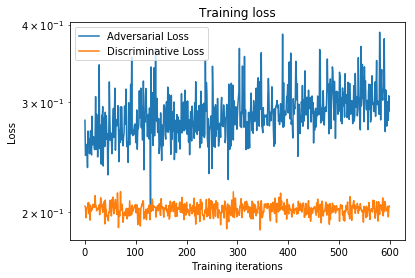

In [162]:
# adversarial_loss_map = get_2D_array_values(adversarial_loss, 0)
# discrimator_loss_map = get_2D_array_values(discrimator_loss, 0)

ax = pd.DataFrame(
    {
        'Adversarial Loss': adversarial_loss,
        'Discriminative Loss': discrimator_loss,
    }
).plot(title='Training loss', logy=True)
ax.set_xlabel("Training iterations")
ax.set_ylabel("Loss")

In [163]:
targets = test.Close[7:]
preds = gan.predict(X_test).squeeze()

In [164]:
# Should look at other metrics as well (MSE, RMSE, Accuracy)
metrics.mean_absolute_error(preds, y_test)

0.442115416745874

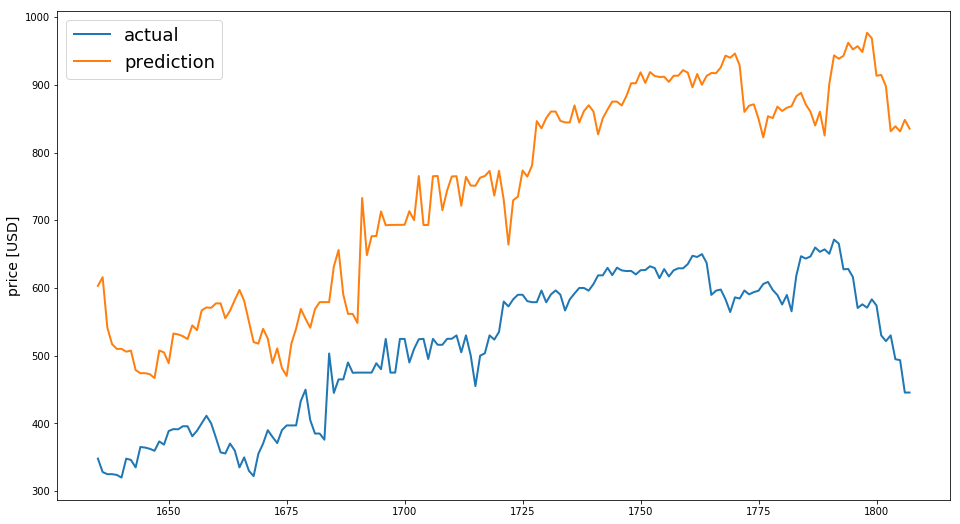

In [165]:
preds = test.Close.values[:-7] * (preds + 1)
preds = pd.Series(index=targets.index, data=preds)

line_plot(targets, preds, 'actual', 'prediction')

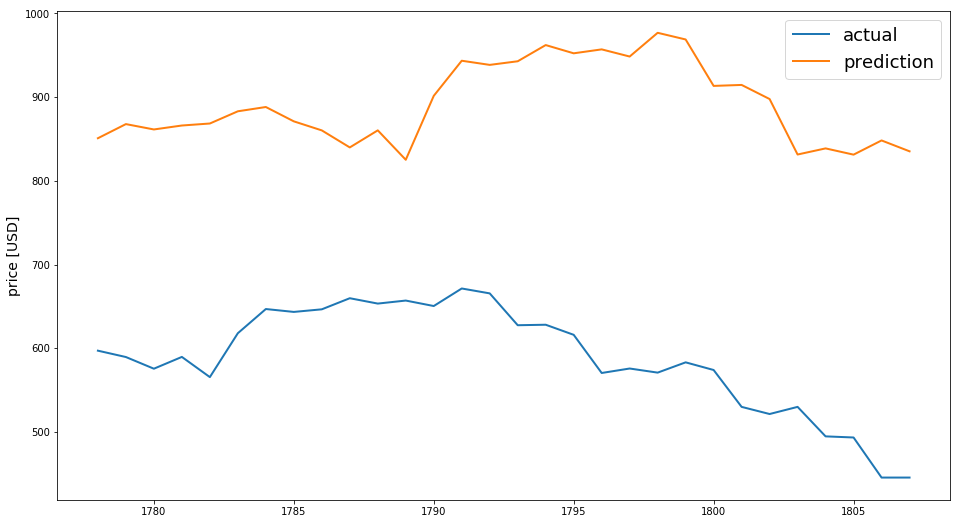

In [166]:
n_points = 30

line_plot(targets[-n_points:], preds[-n_points:], 'actual', 'prediction')